## **Aim**: Multiple Linear Regression in Python

### Implementation in Python

https://www.kaggle.com/datasets/quantbruce/real-estate-price-prediction


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [15]:
# Importing data
df = pd.read_csv('./Real-estate1.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


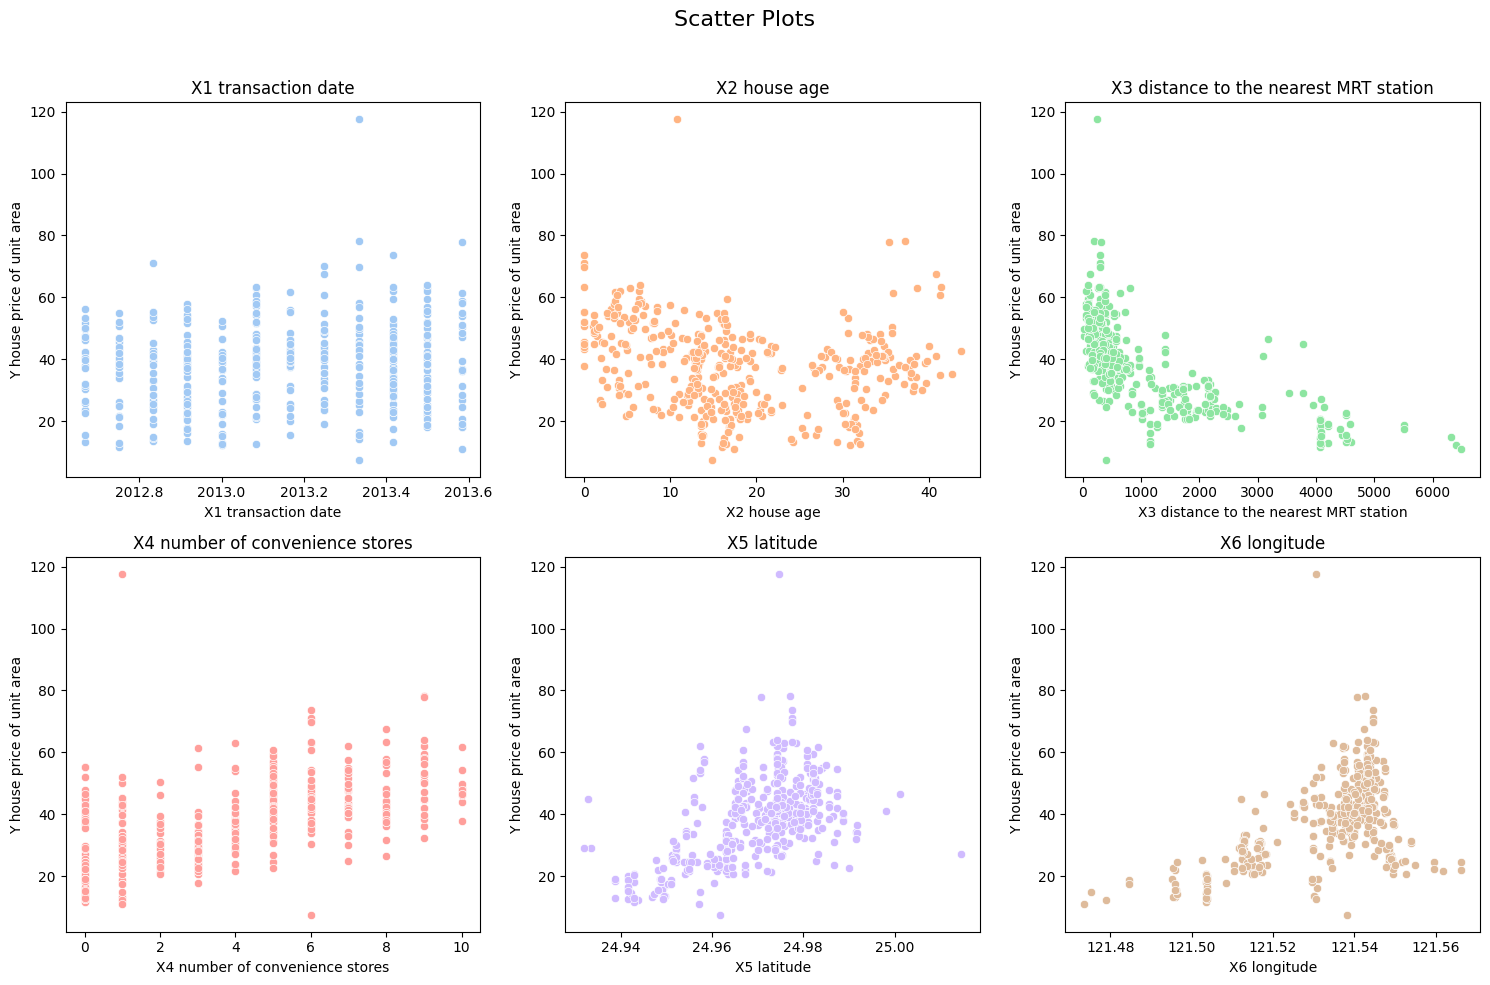

In [21]:
target_variable = "Y house price of unit area"
colors = sns.color_palette("pastel", n_colors=6)

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Scatter Plots', fontsize=16)

sns.scatterplot(x=df['X1 transaction date'], y=df[target_variable], ax=axes[0, 0], color=colors[0])
axes[0, 0].set_title('X1 transaction date')

sns.scatterplot(x=df['X2 house age'], y=df[target_variable], ax=axes[0, 1], color=colors[1])
axes[0, 1].set_title('X2 house age')

sns.scatterplot(x=df['X3 distance to the nearest MRT station'], y=df[target_variable], ax=axes[0, 2], color=colors[2])
axes[0, 2].set_title('X3 distance to the nearest MRT station')

sns.scatterplot(x=df['X4 number of convenience stores'], y=df[target_variable], ax=axes[1, 0], color=colors[3])
axes[1, 0].set_title('X4 number of convenience stores')

sns.scatterplot(x=df['X5 latitude'], y=df[target_variable], ax=axes[1, 1], color=colors[4])
axes[1, 1].set_title('X5 latitude')

sns.scatterplot(x=df['X6 longitude'], y=df[target_variable], ax=axes[1, 2], color=colors[5])
axes[1, 2].set_title('X6 longitude')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [23]:
df = df.drop(['No'], axis = 1)

In [24]:
X = df.drop('Y house price of unit area',axis= 1)
y = df['Y house price of unit area']
print(X)
print(y)

     X1 transaction date  X2 house age  \
0               2012.917          32.0   
1               2012.917          19.5   
2               2013.583          13.3   
3               2013.500          13.3   
4               2012.833           5.0   
..                   ...           ...   
409             2013.000          13.7   
410             2012.667           5.6   
411             2013.250          18.8   
412             2013.000           8.1   
413             2013.500           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..             

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

# Calculate and print the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 53.505619124504506


In [27]:
X_test.shape

(83, 6)

In [30]:
X_test.head(1)

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
358,2013.167,1.1,193.5845,6,24.96571,121.54089


In [44]:
X1 = float(input('Enter transaction date:'))
X2 = float(input('Enter house age:'))
X3 = float(input('Enter distance to the nearest MRT station:'))
X4 = float(input('Enter number of convenience stores:'))
X5 = float(input('Enter latitude:'))
X6 = float(input('Enter longitude:'))

Enter transaction date:2013.167
Enter house age:1.1
Enter distance to the nearest MRT station:193
Enter number of convenience stores:6
Enter latitude:24
Enter longitude:123.5


In [45]:
new_data = np.array([[X1, X2, X3, X4, X5, X6]])

predicted_price = model.predict(new_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [46]:
print(predicted_price)

[-231.07936137]


In [36]:
r_squared_train = model.score(X_train, y_train)
print(f'R-squared (Coefficient of Determination) on Training Data: {r_squared_train:.2f}')

intercept = model.intercept_
coefficients = model.coef_

print(f'Intercept: {intercept:.2f}')
print('Coefficients:')
for i, coef in enumerate(coefficients):
    print(f'   Coefficient for X{i + 1}: {coef:.2f}')


R-squared (Coefficient of Determination) on Training Data: 0.56
Intercept: -13044.23
Coefficients:
   Coefficient for X1: 5.44
   Coefficient for X2: -0.27
   Coefficient for X3: -0.00
   Coefficient for X4: 1.09
   Coefficient for X5: 229.04
   Coefficient for X6: -29.49


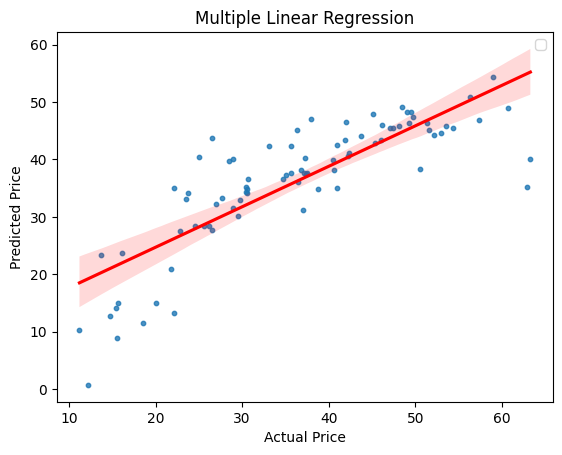

In [13]:
sns.regplot(x=y_test, y=y_pred, scatter_kws={'s': 10}, line_kws={'color': 'red'})

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Multiple Linear Regression')
plt.legend()
plt.show()

### Implementation in R


In [6]:
# Install and load necessary packages
library(tidyverse)
library(gridExtra)
library(dplyr)
library(broom)
library(ggplot2)


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




In [5]:
install.packages("gridExtra")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [1]:
df <- read.csv("Real-estate1.csv")
head(df)

,No,X1.transaction.date,X2.house.age,X3.distance.to.the.nearest.MRT.station,X4.number.of.convenience.stores,X5.latitude,X6.longitude,Y.house.price.of.unit.area
,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,2012.917,32.0,84.87882,10,24.98298,121.5402,37.9
2,2,2012.917,19.5,306.59470,9,24.98034,121.5395,42.2
3,3,2013.583,13.3,561.98450,5,24.98746,121.5439,47.3
4,4,2013.500,13.3,561.98450,5,24.98746,121.5439,54.8
5,5,2012.833,5.0,390.56840,5,24.97937,121.5425,43.1
6,6,2012.667,7.1,2175.03000,3,24.96305,121.5125,32.1


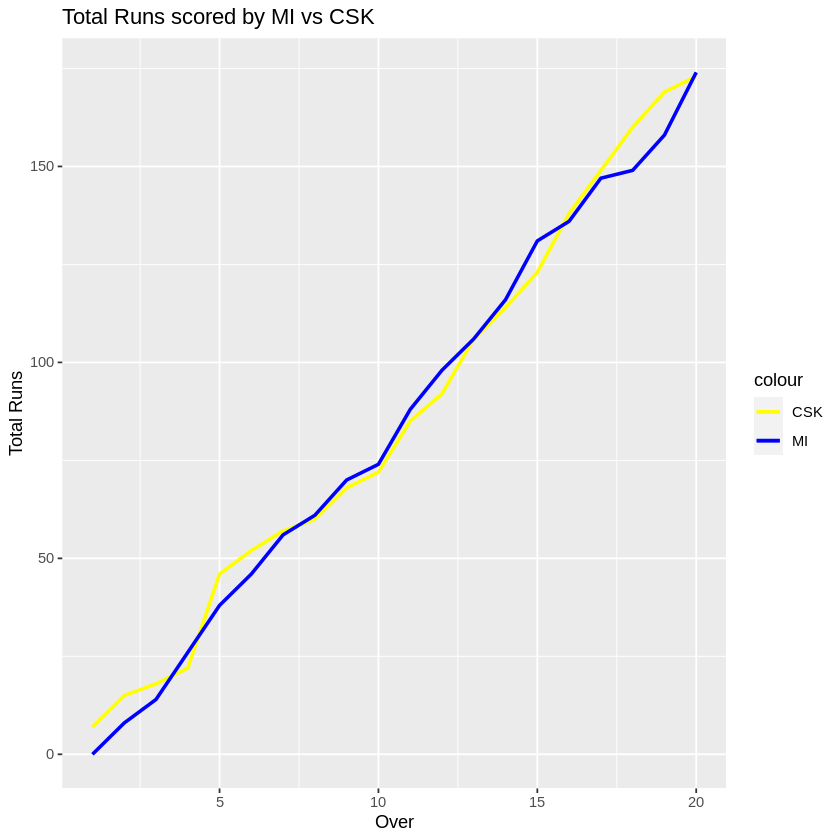

In [ ]:
mi_batting_0 <- team_totals[team_totals$mi_batting == 0, ]
mi_batting_1 <- team_totals[team_totals$mi_batting == 1, ]

# Plot the line graph
ggplot() +
  geom_line(data = mi_batting_0, aes(x = over, y = team_score, color = "CSK"), size = 1) +
  geom_line(data = mi_batting_1, aes(x = over, y = team_score, color = "MI"), size = 1) +
  labs(x = "Over", y = "Total Runs", title = "Total Runs scored by MI vs CSK") +
  scale_color_manual(values = c("CSK" = "yellow", "MI" = "blue"))



In [ ]:
# Merge data for mi_batting values 0 and 1 to create features and target variable
features <- rbind(mi_batting_0[c('inning', 'over')],
                  mi_batting_1[c('inning', 'over')])
target <- c(mi_batting_0$team_score, mi_batting_1$team_score)

In [ ]:
# Set seed for reproducibility
set.seed(42)

# Create an index for data splitting
splitIndex <- sample(1:nrow(features), 0.8 * nrow(features))

# Split the data into training and testing sets
X_train <- features[splitIndex, , drop = FALSE]
X_test <- features[-splitIndex, , drop = FALSE]
y_train <- target[splitIndex]
y_test <- target[-splitIndex]


In [ ]:
# Train a linear regression model
model <- lm(y_train ~ ., data = X_train)

In [ ]:
# Predict the target variable on the test set
y_pred <- predict(model, newdata = X_test)


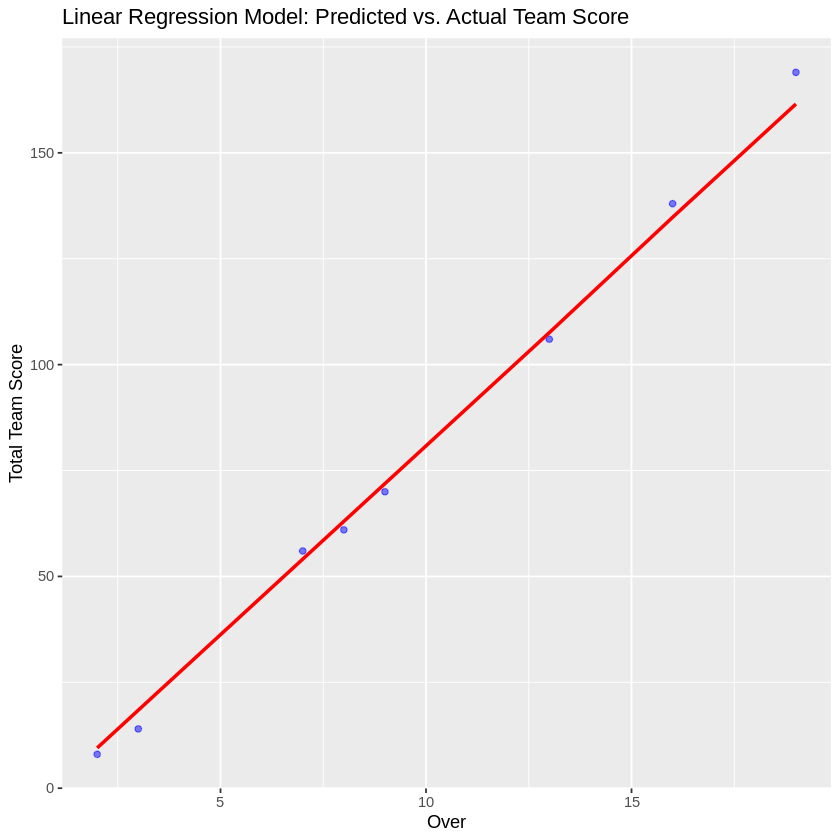

In [ ]:
ggplot() +
  geom_point(aes(x = X_test$over, y = y_test), color = "blue", alpha = 0.5) +
  geom_line(aes(x = X_test$over, y = y_pred), color = "red", size = 1) +
  labs(x = "Over", y = "Total Team Score", title = "Linear Regression Model: Predicted vs. Actual Team Score")